# Proyek Klasifikasi Gambar: [Vegetable Image Dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)
- **Nama:** Joshua Palti Sinaga
- **Email:** josua123690707@gmail.com
- **ID Dicoding:** jo_sua_07

## Import Semua Packages/Library yang Digunakan

In [21]:
!pip install tensorflowjs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


## Data Preparation

### Data Loading

In [2]:
import kagglehub

download_path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
print("Path to downloaded dataset files:", download_path)

100%|██████████| 534M/534M [00:09<00:00, 61.9MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/misrakahmed/vegetable-image-dataset/versions/1


In [3]:
import shutil
import os
import glob

shutil.copytree(download_path, "./dataset", dirs_exist_ok=True)

for filename in glob.glob('./dataset/Vegetable Images/*'):
    shutil.move(filename, './dataset/')
    print(filename)

for dir in ['./dataset/test','./dataset/train','./dataset/validation']:
  print(dir)
  for label in os.listdir(dir):
      os.rename(f'{dir}/{label}', f'{dir}/{label.lower()}')
  print(os.listdir(dir))

shutil.rmtree('./dataset/Vegetable Images')

./dataset/Vegetable Images/validation
./dataset/Vegetable Images/test
./dataset/Vegetable Images/train
./dataset/test
['cabbage', 'cauliflower', 'carrot', 'bitter_gourd', 'bean', 'broccoli', 'pumpkin', 'tomato', 'capsicum', 'potato', 'bottle_gourd', 'cucumber', 'papaya', 'radish', 'brinjal']
./dataset/train
['cabbage', 'cauliflower', 'carrot', 'bitter_gourd', 'bean', 'broccoli', 'pumpkin', 'tomato', 'capsicum', 'potato', 'bottle_gourd', 'cucumber', 'papaya', 'radish', 'brinjal']
./dataset/validation
['cabbage', 'cauliflower', 'carrot', 'bitter_gourd', 'bean', 'broccoli', 'pumpkin', 'tomato', 'capsicum', 'potato', 'bottle_gourd', 'cucumber', 'papaya', 'radish', 'brinjal']


In [4]:
import os
import shutil
import random

dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
val_dir = os.path.join(dataset_dir, "validation")

new_train_dir = "new_dataset/train"
new_test_dir = "new_dataset/test"

os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

def restructure_data():
    for category in os.listdir(train_dir):
        category_train_path = os.path.join(train_dir, category)
        category_test_path = os.path.join(test_dir, category)
        category_val_path = os.path.join(val_dir, category)

        if not os.path.isdir(category_train_path):
            continue

        all_images = []
        for source in [category_train_path, category_test_path, category_val_path]:
            if os.path.exists(source):
                all_images.extend([os.path.join(source, f) for f in os.listdir(source)])

        random.shuffle(all_images)

        split_idx = int(0.8 * len(all_images))
        train_images = all_images[:split_idx]
        test_images = all_images[split_idx:]

        new_category_train_path = os.path.join(new_train_dir, category)
        new_category_test_path = os.path.join(new_test_dir, category)
        os.makedirs(new_category_train_path, exist_ok=True)
        os.makedirs(new_category_test_path, exist_ok=True)

        for img in train_images:
            shutil.move(img, os.path.join(new_category_train_path, os.path.basename(img)))

        for img in test_images:
            shutil.move(img, os.path.join(new_category_test_path, os.path.basename(img)))

        print(f"Processed {category}: {len(train_images)} train, {len(test_images)} test")

restructure_data()

Processed cabbage: 1120 train, 280 test
Processed cauliflower: 1120 train, 280 test
Processed carrot: 1120 train, 280 test
Processed bitter_gourd: 1120 train, 280 test
Processed bean: 1120 train, 280 test
Processed broccoli: 1120 train, 280 test
Processed pumpkin: 1120 train, 280 test
Processed tomato: 1120 train, 280 test
Processed capsicum: 1120 train, 280 test
Processed potato: 1120 train, 280 test
Processed bottle_gourd: 1120 train, 280 test
Processed cucumber: 1120 train, 280 test
Processed papaya: 1120 train, 280 test
Processed radish: 1120 train, 280 test
Processed brinjal: 1120 train, 280 test


### Data Labelling

In [5]:
import os

def get_labels(train_dir, test_dir):
    train_dirs = set(os.listdir(train_dir))
    test_dirs = set(os.listdir(test_dir))

    missing_in_test = train_dirs - test_dirs

    print("Directories in train but not in test:", missing_in_test)

    if not missing_in_test:
        print("All directories in train exist in test and validation.")

    return list(train_dirs)

train_path = "./new_dataset/train"
test_path = "./new_dataset/test"

labels = get_labels(train_path, test_path)
print("Labels: ", labels)

Directories in train but not in test: set()
All directories in train exist in test and validation.
Labels:  ['pumpkin', 'papaya', 'potato', 'cabbage', 'brinjal', 'bitter_gourd', 'tomato', 'broccoli', 'carrot', 'bean', 'cucumber', 'cauliflower', 'capsicum', 'bottle_gourd', 'radish']


### Data Preprocessing

#### Split Dataset

In [6]:
import pandas as pd

train_df = pd.DataFrame(columns=['path', 'label'])
for label in labels:
    for path in os.listdir(os.path.join(train_path, label)):
        train_df = pd.concat([train_df, pd.DataFrame({'path': [os.path.join(train_path, label, path)], 'label': [label]})])
train_df = train_df.reset_index(drop=True)
train_df

path    label
0      ./new_dataset/train/pumpkin/0072.jpg  pumpkin
1      ./new_dataset/train/pumpkin/0730.jpg  pumpkin
2      ./new_dataset/train/pumpkin/0468.jpg  pumpkin
3      ./new_dataset/train/pumpkin/1045.jpg  pumpkin
4      ./new_dataset/train/pumpkin/1153.jpg  pumpkin
...                                     ...      ...
16795   ./new_dataset/train/radish/0170.jpg   radish
16796   ./new_dataset/train/radish/0148.jpg   radish
16797   ./new_dataset/train/radish/1355.jpg   radish
16798   ./new_dataset/train/radish/1309.jpg   radish
16799   ./new_dataset/train/radish/1116.jpg   radish

[16800 rows x 2 columns]

In [7]:
test_df = pd.DataFrame(columns=['path', 'label'])
for label in labels:
    for path in os.listdir(os.path.join(test_path, label)):
        test_df = pd.concat([test_df, pd.DataFrame({'path': [os.path.join(test_path, label, path)], 'label': [label]})])
test_df = test_df.reset_index(drop=True)
test_df

path    label
0     ./new_dataset/test/pumpkin/0996.jpg  pumpkin
1     ./new_dataset/test/pumpkin/0060.jpg  pumpkin
2     ./new_dataset/test/pumpkin/0403.jpg  pumpkin
3     ./new_dataset/test/pumpkin/0481.jpg  pumpkin
4     ./new_dataset/test/pumpkin/0474.jpg  pumpkin
...                                   ...      ...
4195   ./new_dataset/test/radish/0969.jpg   radish
4196   ./new_dataset/test/radish/0294.jpg   radish
4197   ./new_dataset/test/radish/1233.jpg   radish
4198   ./new_dataset/test/radish/1192.jpg   radish
4199   ./new_dataset/test/radish/0210.jpg   radish

[4200 rows x 2 columns]

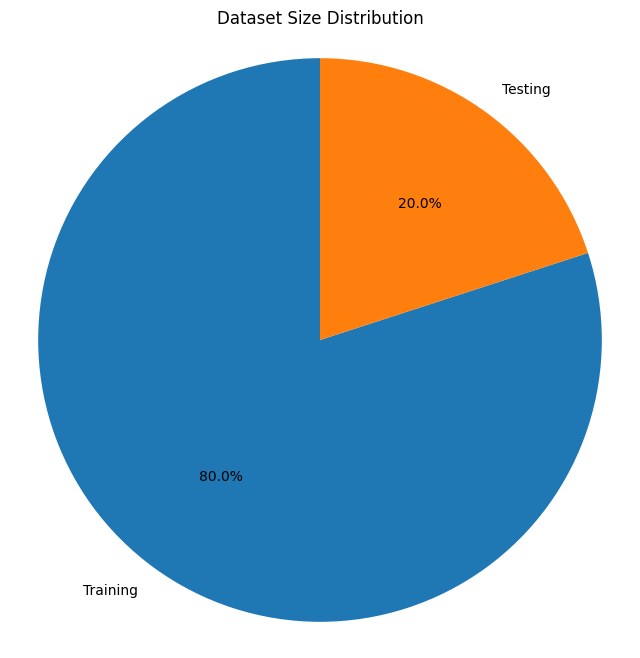

In [8]:
import matplotlib.pyplot as plt

dataset_sizes = {
    'Training': len(train_df),
    'Testing': len(test_df)
}

lbls = list(dataset_sizes.keys())
sizes = list(dataset_sizes.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=lbls, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Size Distribution')
plt.axis('equal')
plt.show()


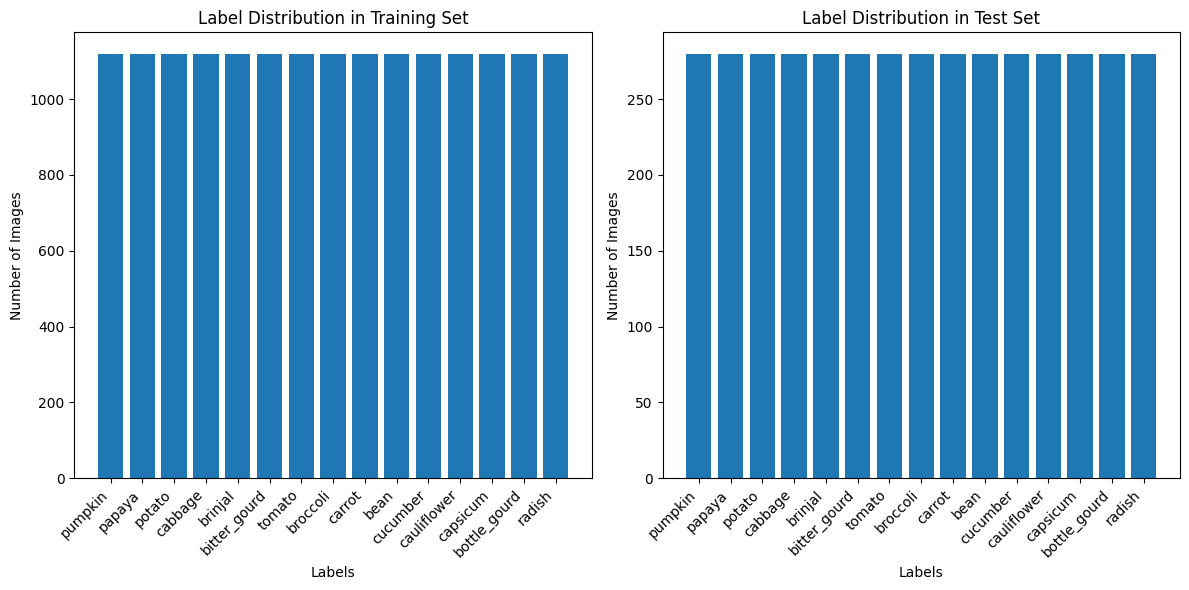

In [9]:
import matplotlib.pyplot as plt

train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()
labels = train_label_counts.index

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, train_label_counts)
plt.title('Label Distribution in Training Set')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
plt.bar(labels, test_label_counts)
plt.title('Label Distribution in Test Set')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

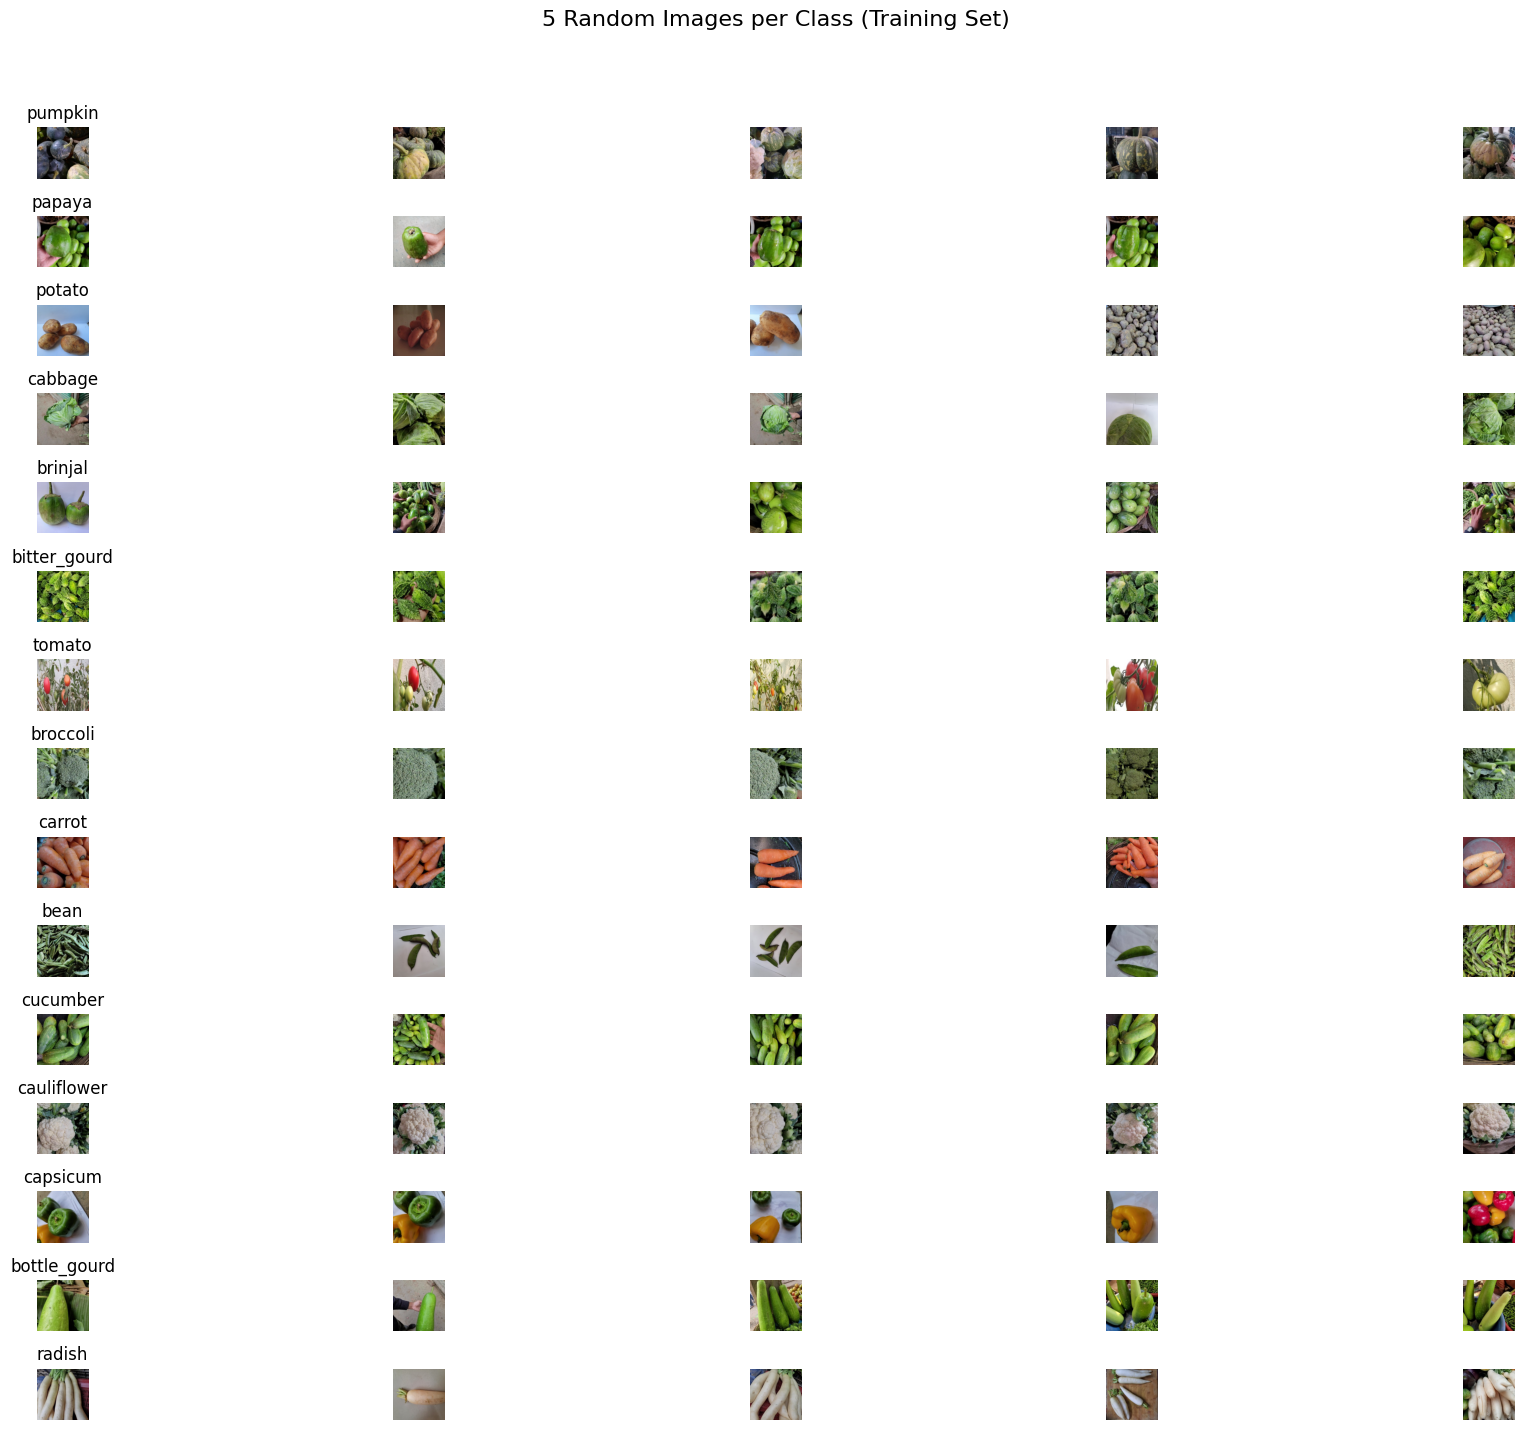

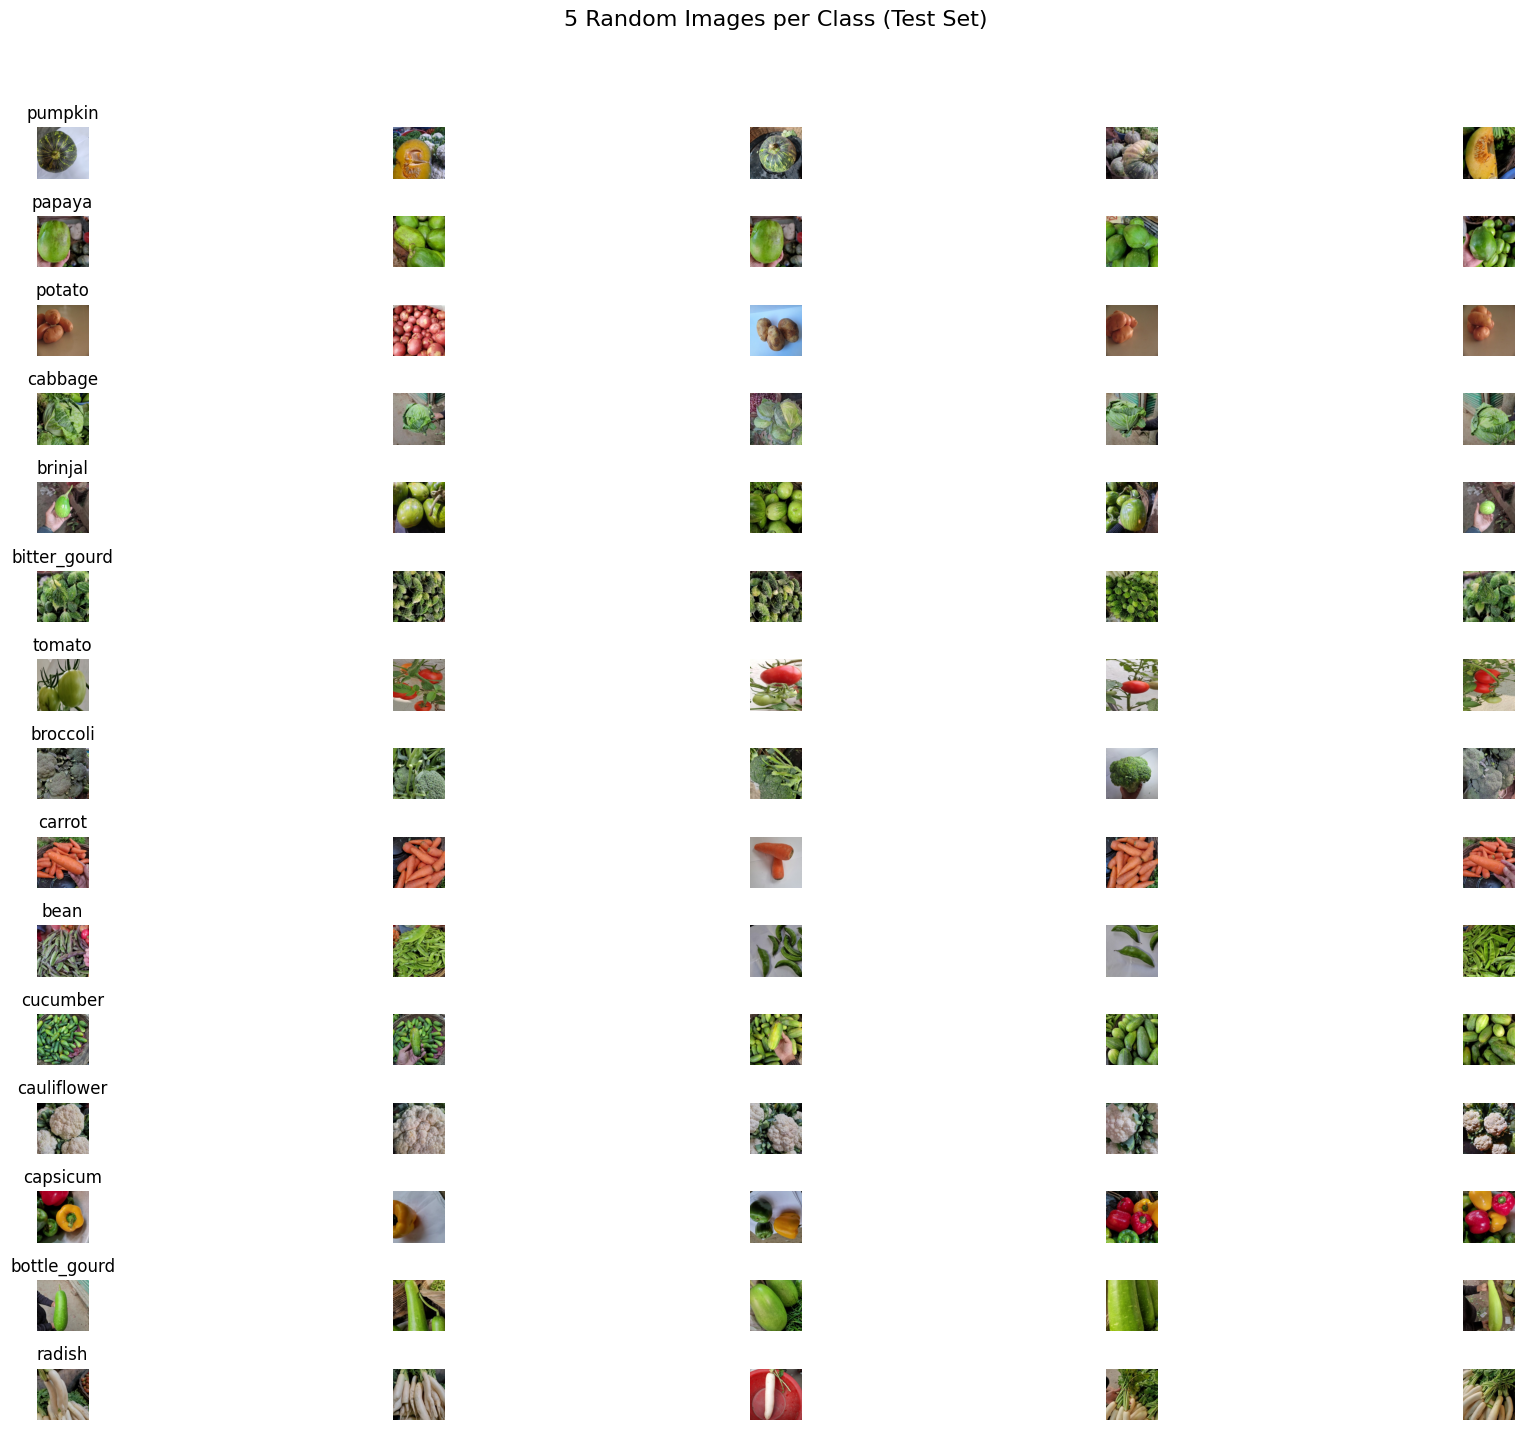

In [10]:
import matplotlib.pyplot as plt
import os
import random

def show_images_per_class(df, title):
    labels = df['label'].unique()

    plt.figure(figsize=(20, 15))
    num_cols = 5
    num_rows = len(labels)

    for i, label in enumerate(labels):
        label_df = df[df['label'] == label]
        images = random.sample(list(label_df['path']), min(5, len(label_df)))

        for j, img_path in enumerate(images):
            subplot_index = i * num_cols + j + 1
            plt.subplot(num_rows, num_cols, subplot_index, aspect='equal')
            try:
                img = plt.imread(img_path)
                plt.imshow(img)
                plt.axis('off')
                if j == 0:
                    plt.title(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

show_images_per_class(train_df, "5 Random Images per Class (Training Set)")
show_images_per_class(test_df, "5 Random Images per Class (Test Set)")

In [11]:
from PIL import Image
import os

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print_images_resolution(train_path)

cabbage: 1120
- (224, 224)
---------------
cauliflower: 1120
- (224, 224)
---------------
carrot: 1120
- (224, 224)
---------------
bitter_gourd: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
bean: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
broccoli: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
pumpkin: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
tomato: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
capsicum: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
potato: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
bottle_gourd: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
cucumber: 1120
- (224, 224)
- (224, 193)
- (224, 205)
- (224, 200)
---------------
papaya: 1120
- (224, 193)
- (224, 205)
- (224, 211)
- (224, 224)
- (224, 198)
- (224, 223)
- (224, 207)
- (224, 210)
- (22

## Modelling

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE, IMG_SIZE = 224, 224
batch_size = 128

train_datagen = ImageDataGenerator(
   rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 16800 validated image filenames belonging to 15 classes.
Found 4200 validated image filenames belonging to 15 classes.


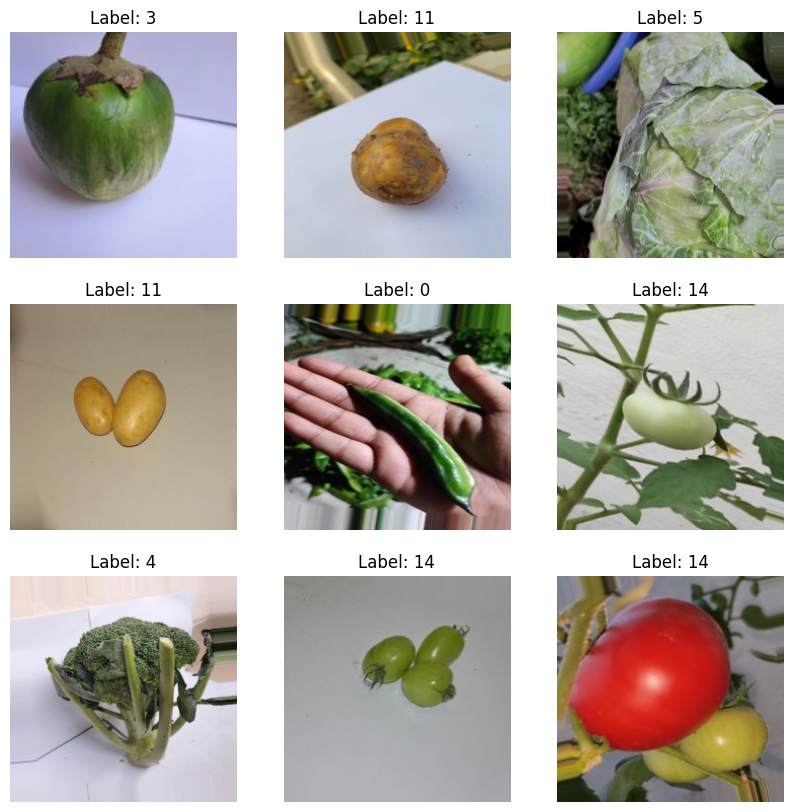

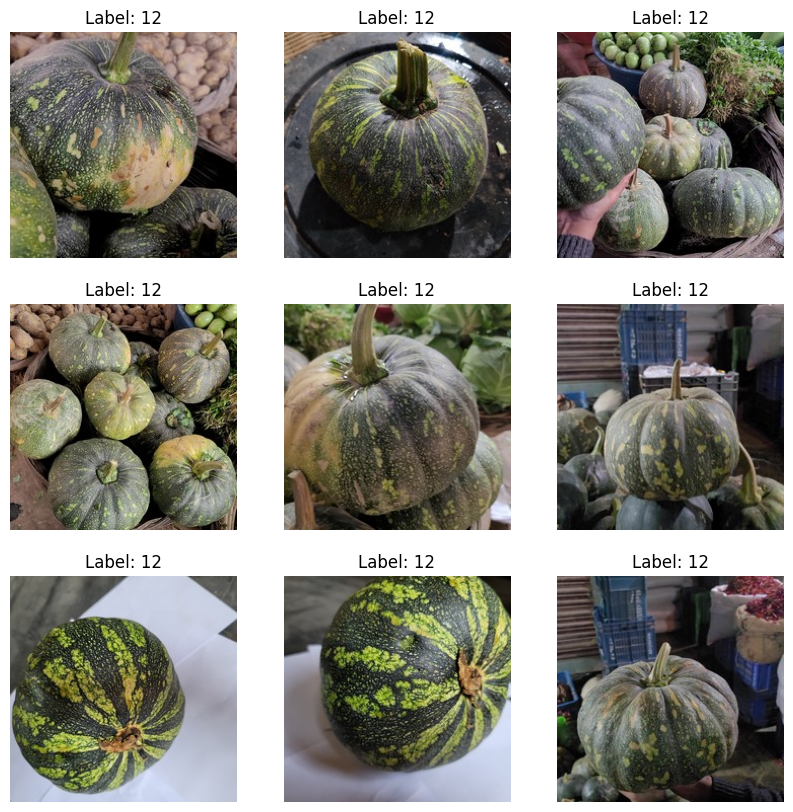

In [13]:
import matplotlib.pyplot as plt

images, labelz = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labelz[i].argmax()}")
    plt.axis('off')
plt.show()


images, labelz = next(validation_generator)

plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 gambar
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labelz[i].argmax()}")
    plt.axis('off')
plt.show()


In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = keras.Sequential([
    layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(1024, activation='relu', ),
    layers.Dense(128, activation='relu', ),
    layers.Dense(len(labels), activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 32)        │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 89888)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      92,046,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,235,567 (351.85 MB)

 Trainable params: 92,235,567 (351.85 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import tensorflow as tf

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nAkurasi dan Akurasi Validation sudah mencapai 95%, menghentikan training...")
            self.model.stop_training = True

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
    MyCallback()
]

epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3699 - loss: 1.9116

132/132 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.3711 - loss: 1.9083 - val_accuracy: 0.7110 - val_loss: 0.8907
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7255 - loss: 0.8594

132/132 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7258 - loss: 0.8588 - val_accuracy: 0.7783 - val_loss: 0.6456
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8014 - loss: 0.6113

132/132 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8016 - loss: 0.6110 - val_accuracy: 0.8412 - val_loss: 0.4836
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8519 - loss: 0.4698

132/132 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.8520 - loss: 0.4696 - val_accuracy: 0.8924 - val_loss: 0.3719
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8864 - loss: 0.3655

132/132 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8864 - loss: 0.3655 - val_accuracy: 0.8993 - val_loss: 0.3158
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9165 - loss: 0.2905 - val_accuracy: 0.8493 - val_loss: 0.4413
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9208 - loss: 0.2639

132/132 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9208 - loss: 0.2638 - val_accuracy: 0.9162 - val_loss: 0.2710
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9321 - loss: 0.2303

132/132 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9321 - loss: 0.2302 - val_accuracy: 0.9221 - val_loss: 0.2487
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9471 - loss: 0.1807

132/132 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9471 - loss: 0.1807 - val_accuracy: 0.9383 - val_loss: 0.1927
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9509 - loss: 0.1676 - val_accuracy: 0.9283 - val_loss: 0.2244
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9586 - loss: 0.1443


Akurasi dan Akurasi Validation sudah mencapai 95%, menghentikan training...
132/132 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9586 - loss: 0.1442 - val_accuracy: 0.9614 - val_loss: 0.1404


## Evaluasi dan Visualisasi

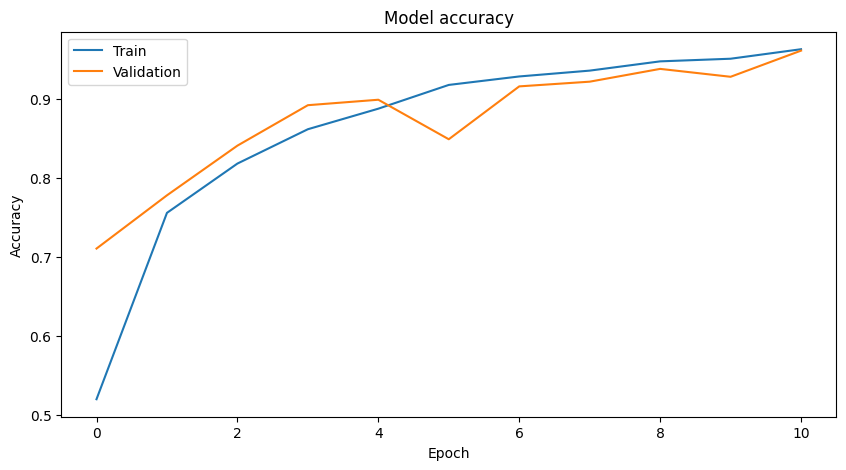

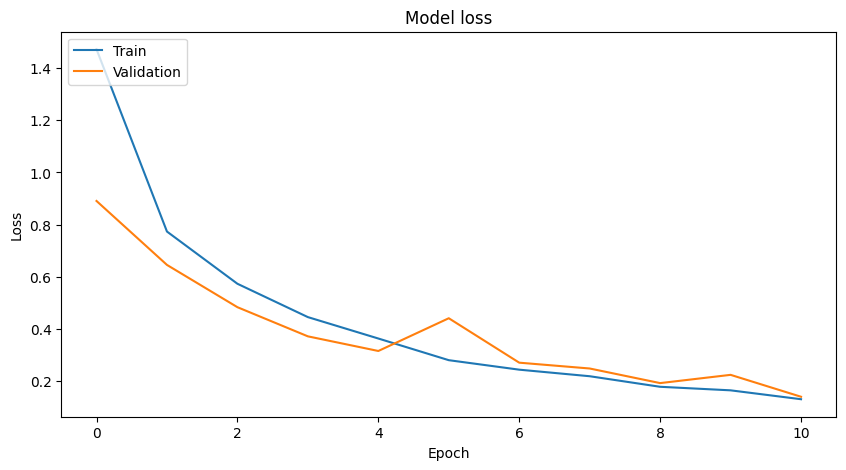

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step
              precision    recall  f1-score   support

     pumpkin       0.95      0.96      0.96       280
      papaya       0.99      0.97      0.98       280
      potato       0.97      0.99      0.98       280
     cabbage       0.91      0.96      0.94       280
     brinjal       0.90      0.97      0.93       280
bitter_gourd       0.89      0.98      0.93       280
      tomato       0.99      0.99      0.99       280
    broccoli       0.98      0.99      0.99       280
      carrot       0.97      0.94      0.95       280
        bean       0.98      0.94      0.96       280
    cucumber       0.97      0.96      0.97       280
 cauliflower       0.99      0.97      0.98       280
    capsicum       0.98      0.91      0.94       280
bottle_gourd       0.98      0.99      0.99       280
      radish       0.98      0.91      0.94       280

    accuracy                           0.96      4200
   macro avg       0.96      0.96      

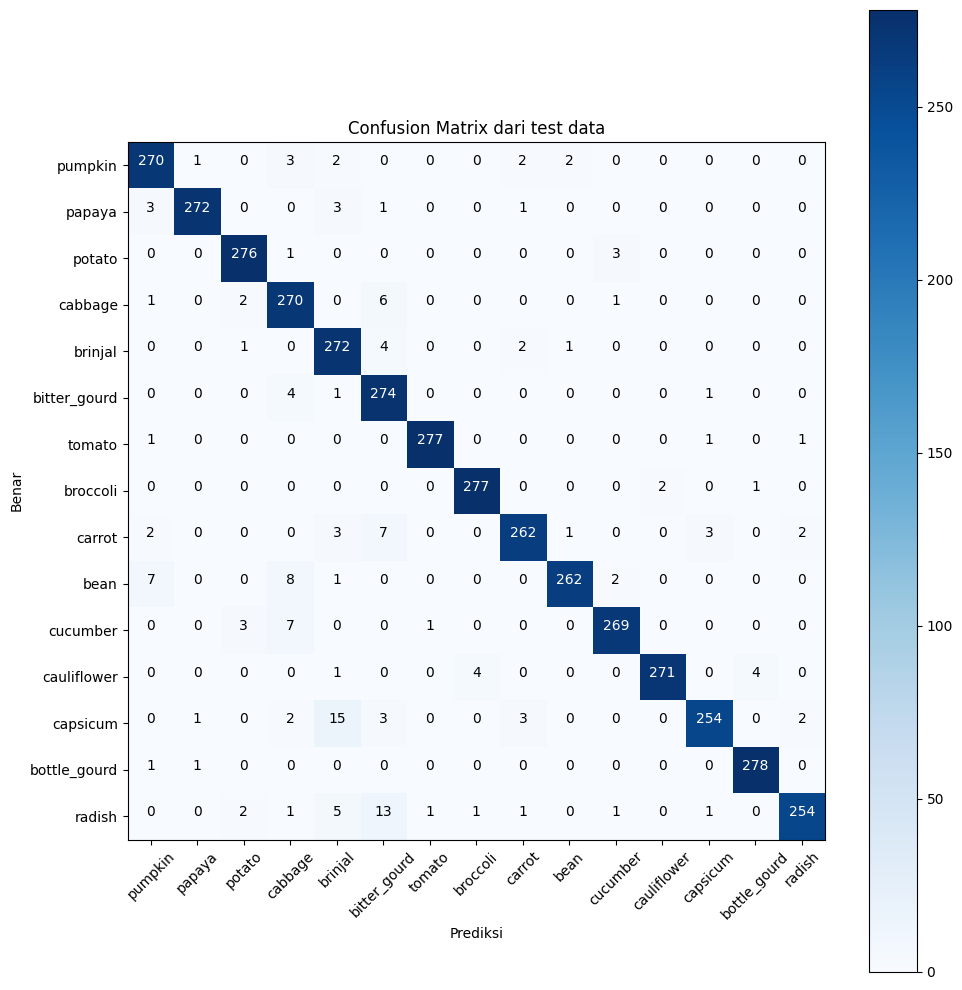

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
Y_true = validation_generator.classes

cm = confusion_matrix(Y_true, y_pred)

from sklearn.metrics import classification_report
print(classification_report(Y_true, y_pred, target_names=labels))

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix dari test data')
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Benar')
plt.xlabel('Prediksi')
plt.show()


## Konversi Model

In [18]:
model.save('saved_model.keras')

In [38]:
import tensorflow as tf
import tensorflowjs as tfjs
import os

source_model_path = "saved_model.keras"
output_dir = "submission"
os.makedirs(output_dir, exist_ok=True)

# Convert to SavedModel format
saved_model_dir = os.path.join(output_dir, "saved_model.keras")
saved_model_dir = os.path.join(output_dir, "saved_model/")
model.export(saved_model_dir)

# Convert to TensorFlow.js format
tfjs_dir = os.path.join(output_dir, "tfjs_model")
os.makedirs(tfjs_dir, exist_ok=True)
tfjs.converters.save_keras_model(tf.keras.models.load_model(source_model_path), tfjs_dir)

# Convert to TensorFlow Lite format
tflite_dir = os.path.join(output_dir, "tflite")
os.makedirs(tflite_dir, exist_ok=True)
converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model(source_model_path))
tflite_model = converter.convert()

# Save TFLite model
with open(os.path.join(tflite_dir, "model.tflite"), "wb") as f:
    f.write(tflite_model)

print("Conversion completed successfully!")


Saved artifact at 'submission/saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  138593328812624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328810896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328811280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328808592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328811856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328808208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328808784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328810704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328810320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328812816: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at '/tmp/tmp2x9r37lv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  138593328643344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328643728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328633744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328642384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593328643920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593247675984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593247675408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593247676752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138593247676176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [42]:
# prompt: zip /content/submission/saved_model/

import zipfile
import os

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

zip_path = '/content/submission_saved_model.zip'
folder_path = '/content/submission/saved_model'

zip_directory(folder_path, zip_path)

print(f"Successfully zipped {folder_path} to {zip_path}")



Successfully zipped /content/submission/saved_model to /content/submission_saved_model.zip


## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


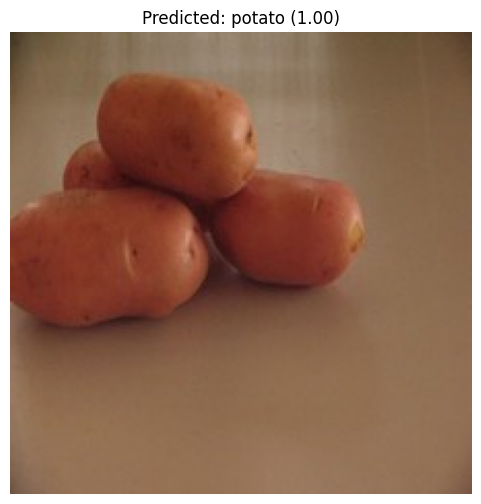

In [30]:
# Model inference menggunakan savedModel
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

model_path = 'submission/saved_model.keras'
model = keras.models.load_model(model_path)

labels = list(train_generator.class_indices.keys())

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(image_path, model, labels):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class_label, confidence

test_image_paths = []
for label in labels:
    label_dir = os.path.join(test_path, label)
    if os.path.isdir(label_dir):
      for img in os.listdir(label_dir):
        test_image_paths.append(os.path.join(label_dir, img))

random_image_path = random.choice(test_image_paths)

predicted_label, confidence = predict_image(random_image_path, model, labels)

plt.figure(figsize=(6, 6))
img = Image.open(random_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label} ({confidence:.2f})')
plt.axis('off')
plt.show()


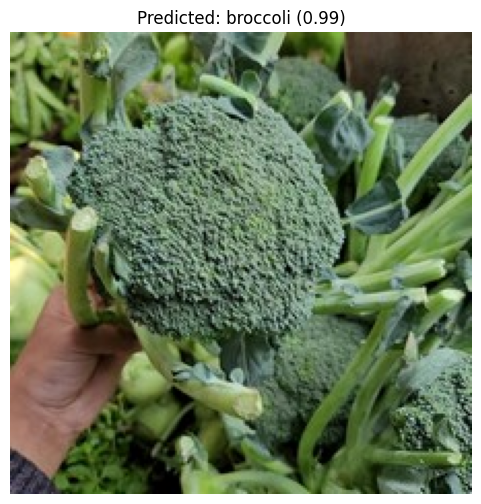

In [32]:
# Model inference menggunakan TFLite
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from PIL import Image
import os

# Load TFLite
tflite_path = 'submission/tflite/model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_tflite(image_path, interpreter, labels):
    img_array = load_and_preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    return predicted_class_label, confidence

test_path = './new_dataset/test'
test_image_paths = []
for label in labels:
    label_dir = os.path.join(test_path, label)
    if os.path.isdir(label_dir):
      for img in os.listdir(label_dir):
        test_image_paths.append(os.path.join(label_dir, img))


random_image_path = random.choice(test_image_paths)
predicted_label, confidence = predict_image_tflite(random_image_path, interpreter, labels)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
img = Image.open(random_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label} ({confidence:.2f})')
plt.axis('off')
plt.show()

In [35]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2025.1.27.0.32.44
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.34.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.9.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.1


In [36]:
# prompt: zip submission

import zipfile
import os

def zip_submission(output_filename='submission.zip', directory='submission'):
    with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                arc_path = os.path.relpath(file_path, directory)
                zipf.write(file_path, arc_path)
    print(f'Successfully zipped contents of {directory} into {output_filename}')

zip_submission()


Successfully zipped contents of submission into submission.zip
